# Install Dependencies

In [1]:
# !pip install tensorflow opencv-python matplotlib pickle

# Setup and Load Data

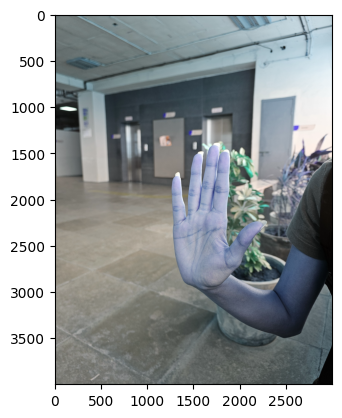

In [2]:
import os

# os.listdir('data/')

import cv2
from matplotlib import pyplot as plt

img = cv2.imread(os.path.join('data', 'hello', 'hello_01.jpg'))
img.shape
plt.imshow(img)

# by default it will show in BGR

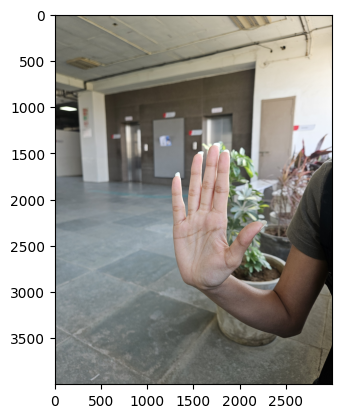

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [5]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [6]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(400,400))
# data = tf.keras.utils.image_dataset_from_directory('data', batch_size=16, image_size(128,128))

Found 600 files belonging to 4 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
batch

(array([[[[210.5      , 209.5      , 214.5      ],
          [212.5      , 211.5      , 216.5      ],
          [216.5      , 215.5      , 221.5      ],
          ...,
          [210.       , 203.       , 195.       ],
          [209.5      , 205.5      , 196.5      ],
          [206.       , 202.       , 193.       ]],
 
         [[203.5      , 202.5      , 207.5      ],
          [207.       , 206.       , 211.       ],
          [204.5      , 208.       , 212.       ],
          ...,
          [210.       , 203.       , 195.       ],
          [209.       , 205.       , 196.       ],
          [209.       , 205.       , 196.       ]],
 
         [[196.5      , 196.5      , 196.5      ],
          [196.       , 200.       , 201.       ],
          [203.       , 204.       , 206.       ],
          ...,
          [212.       , 205.       , 197.       ],
          [211.       , 204.       , 198.       ],
          [210.       , 203.       , 197.       ]],
 
         ...,
 
         [[1

In [10]:
# Images represented as numpy array
batch[0]

array([[[[210.5      , 209.5      , 214.5      ],
         [212.5      , 211.5      , 216.5      ],
         [216.5      , 215.5      , 221.5      ],
         ...,
         [210.       , 203.       , 195.       ],
         [209.5      , 205.5      , 196.5      ],
         [206.       , 202.       , 193.       ]],

        [[203.5      , 202.5      , 207.5      ],
         [207.       , 206.       , 211.       ],
         [204.5      , 208.       , 212.       ],
         ...,
         [210.       , 203.       , 195.       ],
         [209.       , 205.       , 196.       ],
         [209.       , 205.       , 196.       ]],

        [[196.5      , 196.5      , 196.5      ],
         [196.       , 200.       , 201.       ],
         [203.       , 204.       , 206.       ],
         ...,
         [212.       , 205.       , 197.       ],
         [211.       , 204.       , 198.       ],
         [210.       , 203.       , 197.       ]],

        ...,

        [[122.       , 152.       , 10

In [11]:
# Labels ( 0 - hello , 1 - peace , ... )
batch[1]

array([0, 0, 1, 3, 0, 3, 0, 1, 1, 2, 3, 1, 3, 3, 0, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 3, 3, 0, 0, 0, 2, 2])

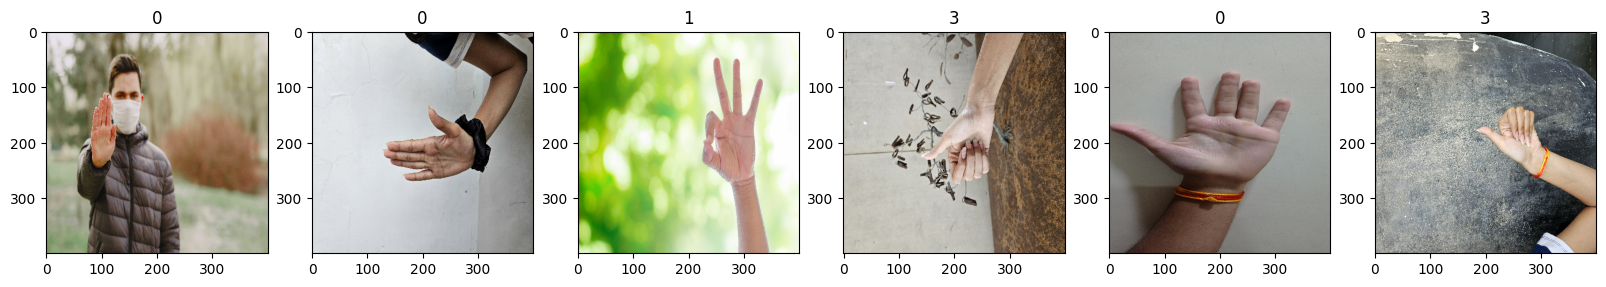

In [12]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# using this we can find out which class(or labels) is assign to which images

# '''
# 0-hello
# 1-okay
# 2-peace
# 3-thumbs_up
# '''

# Preprocess Data

In [13]:
# our batch is divided into 2 parts
# batch[0] will be our images
# batch[1] will be our labels

In [14]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [15]:
scaled = batch[0]/255
print(scaled.min())
print(scaled.max())

0.0
1.0


In [16]:
data = data.map(lambda x,y: (x/255, y))
#here x -> images (independent features)
#     y -> labesl (dependent)

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.78258824, 0.7865098 , 0.7629804 ],
          [0.7767843 , 0.78070587, 0.75717646],
          [0.77443135, 0.7783529 , 0.7548235 ],
          ...,
          [0.7632941 , 0.77113724, 0.75937253],
          [0.81069857, 0.8185417 , 0.806777  ],
          [0.80338836, 0.8112315 , 0.7994668 ]],
 
         [[0.76934904, 0.7732706 , 0.7497412 ],
          [0.76831377, 0.77223533, 0.7487059 ],
          [0.75686276, 0.7607843 , 0.7372549 ],
          ...,
          [0.8139608 , 0.8218039 , 0.8100392 ],
          [0.8011608 , 0.80900395, 0.79723924],
          [0.80056447, 0.8084076 , 0.7966429 ]],
 
         [[0.7752157 , 0.77913725, 0.75560784],
          [0.7496471 , 0.75356865, 0.73003924],
          [0.7701961 , 0.77411765, 0.75058824],
          ...,
          [0.80313724, 0.8109804 , 0.7992157 ],
          [0.7858823 , 0.79372543, 0.7819607 ],
          [0.80235296, 0.8101961 , 0.7984314 ]],
 
         ...,
 
         [[0.57114047, 0.57114047, 0.5397679 ],
          [0.54227

In [18]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator instance with augmentation parameters
# train_datagen = ImageDataGenerator(
#     rotation_range=20,      # Rotate images randomly by up to 20 degrees
#     width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
#     height_shift_range=0.1, # Shift images vertically by up to 10% of the height
#     shear_range=0.2,        # Shear intensity (shear angle in radians)
#     zoom_range=0.2,         # Zoom in/out on images by up to 20%
#     horizontal_flip=True,   # Randomly flip images horizontally
#     vertical_flip=True,     # Randomly flip images vertically
#     fill_mode='nearest'     # Strategy for filling in newly created pixels
# )

# # Flow training images in batches from the directory
# train_generator = train_datagen.flow_from_directory(
#     'data',                 # Path to the main data directory
#     target_size=(400, 400), # Resize images to 400x400 pixels
#     batch_size=32,          # Number of images in each batch
#     class_mode='sparse'     # Type of label array returned
# )

# Splitting Data

In [19]:
len(data)

19

In [20]:
# so we have length of data as 19 which means we have 19 batches
# and each batch contains 32 images
# hence 19*32 = 608
# but any one batch will have (32-8=24) images as in our case there are total 600 images.

In [21]:
train_size = int(len(data)*.6)    #60%   (training data)   ---------------> for training our model 
val_size = int(len(data)*.2)+1      #20%   (validating data) ---------------> for evaluating our model (use to fine train our model)
test_size = int(len(data)*.2)+1     #20%   (testing data)    ---------------> for testing our model 

#adding +1 because without addind +1 total of (train_size + test_size + val_size)=17 which is not equal to len(data)=19

In [22]:
print(train_size)
print(val_size)
print(test_size)
print(train_size + test_size + val_size) #total batches

11
4
4
19


In [23]:
# Our data is already shuffle using tf.keras.utils.image_dataset_from_directory
# NOTE: If data is not shuffle we have to shuffle it first before splitting the data for train-val-test
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# skip(train_size) will skip the images that already assign for training
# similarly skip(train_size+val_size) will skip the images that already assign for training as well as for validating

(400, 400, 3)

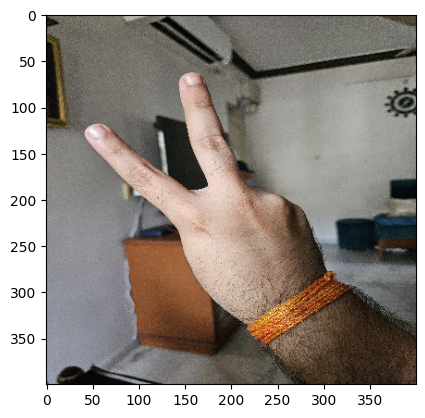

In [24]:
plt.imshow(data.as_numpy_iterator().next()[0][0])
data.as_numpy_iterator().next()[0][0].shape

In [25]:
data.as_numpy_iterator().next()[1]  #labels
data.as_numpy_iterator().next()[1].shape    #32 as we have 32 images per batch

(32,)

# Defining Model

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [52]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))  #instead of relu we can also use sigmoid 
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


# Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator instance with augmentation parameters
# train_datagen = ImageDataGenerator(
#     rotation_range=20,      # Rotate images randomly by up to 20 degrees
#     width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
#     height_shift_range=0.1, # Shift images vertically by up to 10% of the height
#     shear_range=0.2,        # Shear intensity (shear angle in radians)
#     zoom_range=0.2,         # Zoom in/out on images by up to 20%
#     horizontal_flip=True,   # Randomly flip images horizontally
#     vertical_flip=True,     # Randomly flip images vertically
#     fill_mode='nearest'     # Strategy for filling in newly created pixels
# )

# # Flow training images in batches from the directory
# train_generator = train_datagen.flow_from_directory(
#     'data',                 # Path to the main data directory
#     target_size=(400, 400), # Resize images to 400x400 pixels
#     batch_size=32,          # Number of images in each batch
#     class_mode='sparse'     # Type of label array returned
# )


# cnn = models.Sequential([
#     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(400, 400, 3)),
#     layers.MaxPooling2D(),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D(),

#     layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D(),

#     layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D(),
    
#     layers.Flatten(),
    
#     layers.Dense(400, activation='relu'),
#     layers.Dense(200, activation='relu'),
#     layers.Dense(100, activation='relu'),
#     layers.Dense(4, activation='softmax')
# ])


cnn= models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(400, 400, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 398, 398, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 199, 199, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 16)       

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = cnn.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
11/11 [==============================] - 19s 1s/step - loss: 1.9273 - accuracy: 0.2585 - val_loss: 1.3804 - val_accuracy: 0.2422
Epoch 2/50
11/11 [==============================] - 19s 2s/step - loss: 1.3747 - accuracy: 0.2784 - val_loss: 1.3453 - val_accuracy: 0.4062
Epoch 3/50
11/11 [==============================] - 22s 2s/step - loss: 1.3155 - accuracy: 0.4034 - val_loss: 1.2906 - val_accuracy: 0.4922
Epoch 4/50
11/11 [==============================] - 21s 2s/step - loss: 1.1766 - accuracy: 0.5142 - val_loss: 1.1578 - val_accuracy: 0.5781
Epoch 5/50
11/11 [==============================] - 21s 2s/step - loss: 0.9488 - accuracy: 0.6392 - val_loss: 0.9911 - val_accuracy: 0.6797
Epoch 6/50
11/11 [==============================] - 21s 2s/step - loss: 0.8338 - accuracy: 0.7528 - val_loss: 1.0054 - val_accuracy: 0.6875
Epoch 7/50
11/11 [==============================] - 21s 2s/step - loss: 0.6940 - accuracy: 0.8381 - val_loss: 0.8763 - val_accuracy: 0.7109
Epoch 8/50
11/11 [==

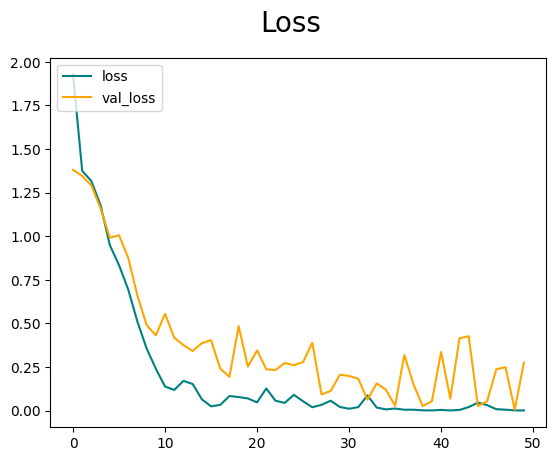

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

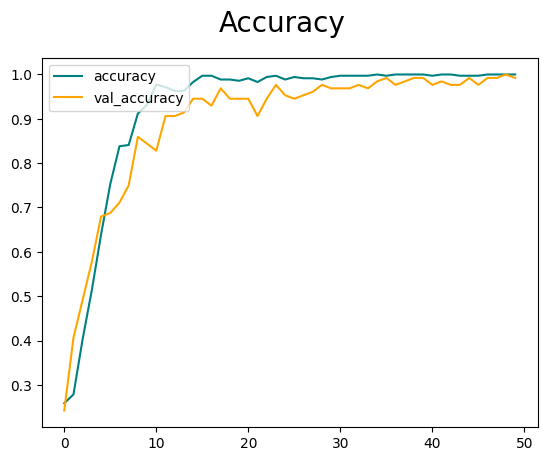

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
len(test)

4

In [63]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    y_pred_prob = cnn.predict(X)  # Predict probabilities
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)


1/1 [==============================] - 0s 125ms/step


In [64]:
print(f'precision:{pre.result().numpy()}, \nresult:{re.result().numpy()}, \naccuracy:{acc.result().numpy()}')

precision:1.0, 
result:1.0, 
accuracy:0.574999988079071


# Prediction

In [72]:
classes_labels = ['hello', 'okay', 'peace', 'thumbs_up']

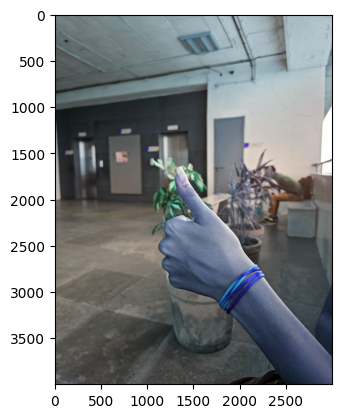

In [73]:
import cv2

img = cv2.imread('sample/sample_06.jpg')
plt.imshow(img)
plt.show()

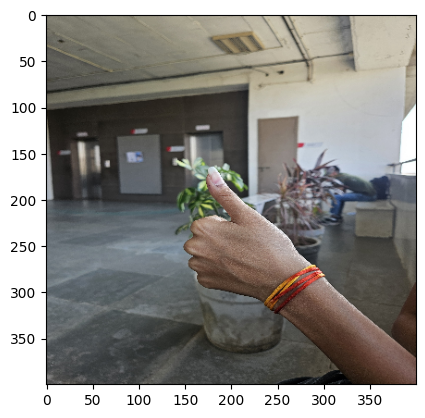

In [74]:
resize = tf.image.resize(img, (400,400))
resize = cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB)  # Convert the resized tensor to a NumPy array
plt.imshow(resize.astype(int))
plt.show()


In [75]:
y_pred = cnn.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [76]:
y_pred

array([[8.6264801e-05, 4.4328289e-04, 1.7242195e-04, 9.9929798e-01]],
      dtype=float32)

In [77]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[3]

In [78]:
classes_labels[ y_classes[0] ]

'thumbs_up'

In [79]:
# Get the predicted class index
y_class_index = np.argmax(y_pred)
predicted_label = classes_labels[y_class_index]

# Get the probability of the predicted class
prediction_probability = y_pred[0][y_class_index]

In [80]:
print(f"Predicted class: {predicted_label} ({prediction_probability:.2%})")
# print(f"Accuracy of prediction: {prediction_probability:.2%}")

Predicted class: thumbs_up (99.93%)


# Saving Model

In [81]:
import pickle

model_file_path = 'model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as file:
    pickle.dump(cnn, file)

print(f"\nModel saved to {model_file_path}")


Model saved to model.pkl
